In [2]:
# import libraries
import pandas as pd
import numpy as np
import time
import itertools
import pickle
import sys

import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
# read grid.csv
grid_df = pd.read_csv('./grid.csv',index_col=0)
n_combinations = len(grid_df)
n_combinations

1944

In [5]:
# Read count df
train_ratio=0.7
count_df = pd.read_csv('../Data/HLA_peptide_count.csv',index_col=0)
count_df['train_count'] = (count_df['total']*train_ratio).astype(int)
count_df

,allele,total,positives,negatives,positive_ratio,total_len9,positives_len9,negatives_len9,positive_ratio_len9,train_count
0,HLA-A*02:01,15726,6058.0,9668.0,0.385222,11610.0,4344.0,7266.0,0.374160,11008
1,HLA-A*03:01,7651,2234.0,5417.0,0.291988,5615.0,1407.0,4208.0,0.250579,5355
2,HLA-A*11:01,6660,2318.0,4342.0,0.348048,4697.0,1467.0,3230.0,0.312327,4662
3,HLA-A*02:03,6333,2409.0,3924.0,0.380388,4449.0,1544.0,2905.0,0.347044,4433
4,HLA-A*31:01,5745,1618.0,4127.0,0.281636,3962.0,1022.0,2940.0,0.257951,4021
...,...,...,...,...,...,...,...,...,...,...
126,HLA-C*08:03,3,0.0,3.0,0.000000,0.0,0.0,0.0,0.000000,2
127,HLA-B*27:10,3,0.0,3.0,0.000000,2.0,0.0,2.0,0.000000,2
128,HLA-A*24:01,2,1.0,1.0,0.500000,2.0,1.0,1.0,0.500000,1
129,HLA-B*13:02,1,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0


In [6]:
#  Read saved data
hyperopts_result_df = pd.read_csv('./hyperopts_result.csv',index_col=0)
hyperopts_result_df = hyperopts_result_df[hyperopts_result_df['allele']=='HLA-A*02:01']
hyperopts_result_df

,allele,fit_time,param_complementary_condition,param_induction_measure,param_max_growing,param_minsupp_new,param_pruning_measure,param_voting_measure,test_f1,test_balanced_accuracy,...,mean_conditions_per_rule,std_conditions_per_rule,mean_induced_conditions_per_rule,std_induced_conditions_per_rule,mean_avg_rule_coverage,std_avg_rule_coverage,mean_avg_rule_precision,std_avg_rule_precision,mean_avg_rule_quality,std_avg_rule_quality
0,HLA-A*02:01,"[5.325525522232056, 2.291874647140503, 1.71519...",0,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.7551155115511551, 0.7656946826758148, 0.770...","[0.8066707394582117, 0.8194653575088358, 0.810...",...,2.370418,0.018463,2.523774,0.026916,0.006629,0.000033,0.926393,0.002808,0.427005,0.002755
0,HLA-A*02:01,"[5.66641902923584, 2.3158295154571533, 2.26177...",1,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.6492187500000001, 0.6576755255850854, 0.668...","[0.7293125458511566, 0.7374678461634984, 0.738...",...,4.682573,0.033251,4.783717,0.037438,0.028715,0.001408,0.965132,0.001380,0.479496,0.002070
0,HLA-A*02:01,"[5.06762957572937, 2.898221015930176, 1.954701...",0,Measures.C2,1,3,Measures.C2,Measures.C2,"[0.7551155115511551, 0.7656946826758148, 0.770...","[0.8066707394582117, 0.8194653575088358, 0.810...",...,2.370418,0.018463,2.523774,0.026916,0.006629,0.000033,0.926393,0.002808,0.427005,0.002755
0,HLA-A*02:01,"[6.001718997955322, 1.9469995498657227, 1.9336...",1,Measures.C2,1,3,Measures.C2,Measures.C2,"[0.6492187500000001, 0.6576755255850854, 0.668...","[0.7293125458511566, 0.7374678461634984, 0.738...",...,4.682573,0.033251,4.783717,0.037438,0.028715,0.001408,0.965132,0.001380,0.479496,0.002070
0,HLA-A*02:01,"[5.511095762252808, 2.895939588546753, 2.12077...",0,Measures.C2,2,3,Measures.C2,Measures.C2,"[0.7551155115511551, 0.7656946826758148, 0.770...","[0.8066707394582117, 0.8194653575088358, 0.810...",...,2.370418,0.018463,2.523774,0.026916,0.006629,0.000033,0.926393,0.002808,0.427005,0.002755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,HLA-A*02:01,"[1.0021579265594482, 0.5380630493164062, 0.573...",1,Measures.Correlation,3,13,Measures.Correlation,Measures.Correlation,"[0.6784203102961918, 0.6808510638297872, 0.712...","[0.7454478527396308, 0.7504417884852668, 0.760...",...,5.460290,0.326013,9.000000,0.000000,0.525339,0.004493,0.691736,0.004696,0.348993,0.006086
0,HLA-A*02:01,"[0.6821141242980957, 0.30144238471984863, 0.24...",0,Measures.Correlation,4,13,Measures.Correlation,Measures.Correlation,"[0.7175452399685287, 0.7020340846619022, 0.744...","[0.7705449733371672, 0.7644221720308677, 0.778...",...,1.009950,0.014072,1.724062,0.042742,0.056319,0.001853,0.778453,0.006957,0.086541,0.000419
0,HLA-A*02:01,"[1.002105712890625, 0.5283548831939697, 0.3398...",1,Measures.Correlation,4,13,Measures.Correlation,Measures.Correlation,"[0.6784203102961918, 0.6808510638297872, 0.712...","[0.7454478527396308, 0.7504417884852668, 0.760...",...,5.460290,0.326013,9.000000,0.000000,0.525339,0.004493,0.691736,0.004696,0.348993,0.006086
0,HLA-A*02:01,"[0.905768871307373, 0.3309335708618164, 0.2436...",0,Measures.Correlation,5,13,Measures.Correlation,Measures.Correlation,"[0.7175452399685287, 0.7020340846619022, 0.744...","[0.7705449733371672, 0.7644221720308677, 0.778...",...,1.009950,0.014072,1.724062,0.042742,0.056319,0.001853,0.778453,0.006957,0.086541,0.000419


# plots

/tmp/ipykernel_41539/3736940147.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'])
/tmp/ipykernel_41539/3736940147.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'])
/tmp/ipykernel_41539/3736940147.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'])
/tmp/ipykernel_41539/3736940147.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'])
/tmp/ipykernel_41539/3736940147.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocato

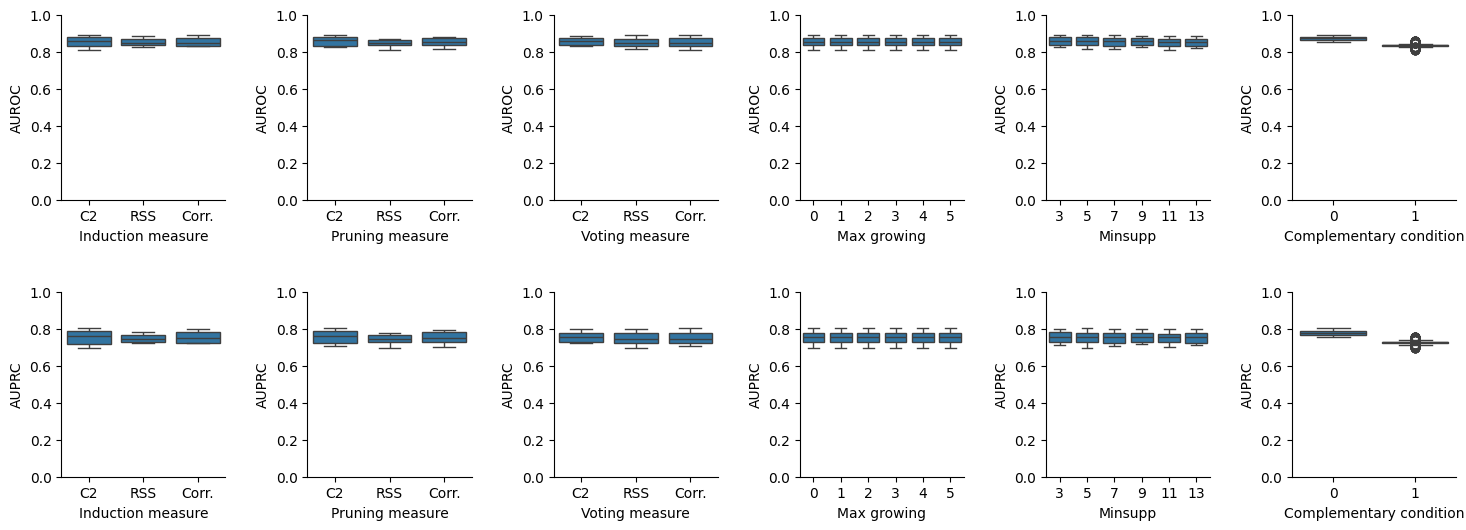

In [8]:
# xvars
x_vars = ['param_induction_measure', 'param_voting_measure', 'param_pruning_measure',
          'param_max_growing', 'param_minsupp_new', 'param_complementary_condition']
x_vars_name = ['Induction measure', 'Pruning measure', 'Voting measure', 
               'Max growing', 'Minsupp', 'Complementary condition']

# yvars
y_vars = ['mean_test_roc_auc', 'mean_test_auprc']
y_vars_name = ['AUROC', 'AUPRC']

fig, axs = plt.subplots(nrows=len(y_vars), ncols=len(x_vars), figsize=(3*len(x_vars), 3*len(y_vars)),
                       gridspec_kw=dict(hspace=0.5, wspace=0.5))

for ydx,(y, yname) in enumerate(zip(y_vars,y_vars_name)):
    for xdx, (x,xname) in enumerate(zip(x_vars,x_vars_name)):
        b = sns.boxplot(data=hyperopts_result_df, x=x, y=y,
                        ax=axs[ydx][xdx])
        sns.despine(top=True, right=True)
        
        b.set(ylim=(0,1))
        b.set_xlabel(xname)
        b.set_ylabel(yname)
        if xdx<3:
            b.set_xticklabels(['C2','RSS','Corr.'])
        

/tmp/ipykernel_41539/325378601.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/325378601.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/325378601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/325378601.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/325378601.py:43: UserWarning: set_ticklabels() should only 

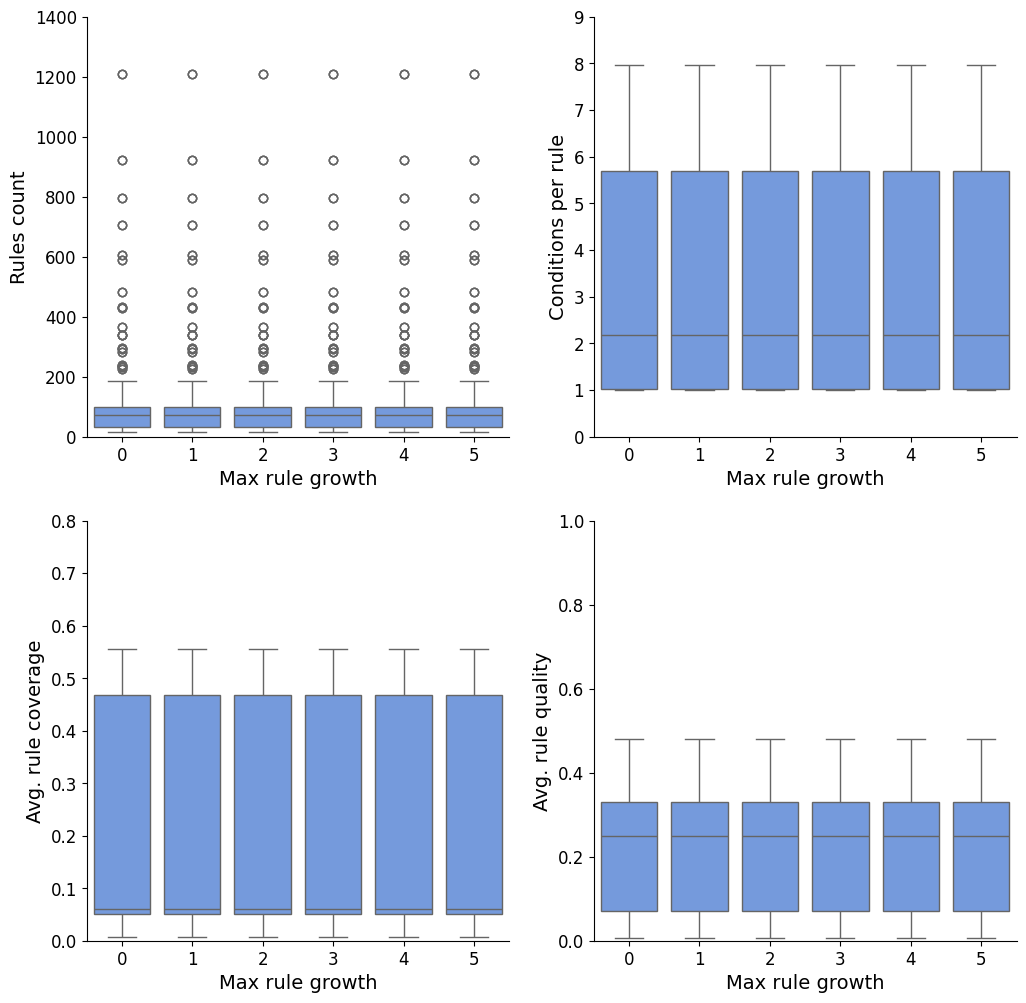

In [9]:
fontsize=14
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Max growth and rule count
b = sns.boxplot(data=hyperopts_result_df, x='param_max_growing', y='mean_rules_count', 
                color='cornflowerblue', ax=axs[0][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,1400))

plt.draw()
b.set_xlabel('Max rule growth',fontsize=fontsize)
b.set_ylabel('Rules count',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# Max growth and conditions_per rule
b = sns.boxplot(data=hyperopts_result_df, x='param_max_growing', y='mean_conditions_per_rule', 
                color='cornflowerblue', ax=axs[0][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,9))

plt.draw()
b.set_ylabel('Conditions per rule',fontsize=fontsize)
b.set_xlabel('Max rule growth',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# Max growth and avg_rule_coverage
b = sns.boxplot(data=hyperopts_result_df, x='param_max_growing', y='mean_avg_rule_coverage', 
                color='cornflowerblue', ax=axs[1][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,0.8))

plt.draw()
b.set_ylabel('Avg. rule coverage',fontsize=fontsize)
b.set_xlabel('Max rule growth',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# Max growth and avg_rule_quality
b = sns.boxplot(data=hyperopts_result_df, x='param_max_growing', y='mean_avg_rule_quality', 
                color='cornflowerblue', ax=axs[1][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,1))

plt.draw()
b.set_ylabel('Avg. rule quality',fontsize=fontsize)
b.set_xlabel('Max rule growth',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)


/tmp/ipykernel_41539/2303040268.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/2303040268.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/2303040268.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/2303040268.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/2303040268.py:43: UserWarning

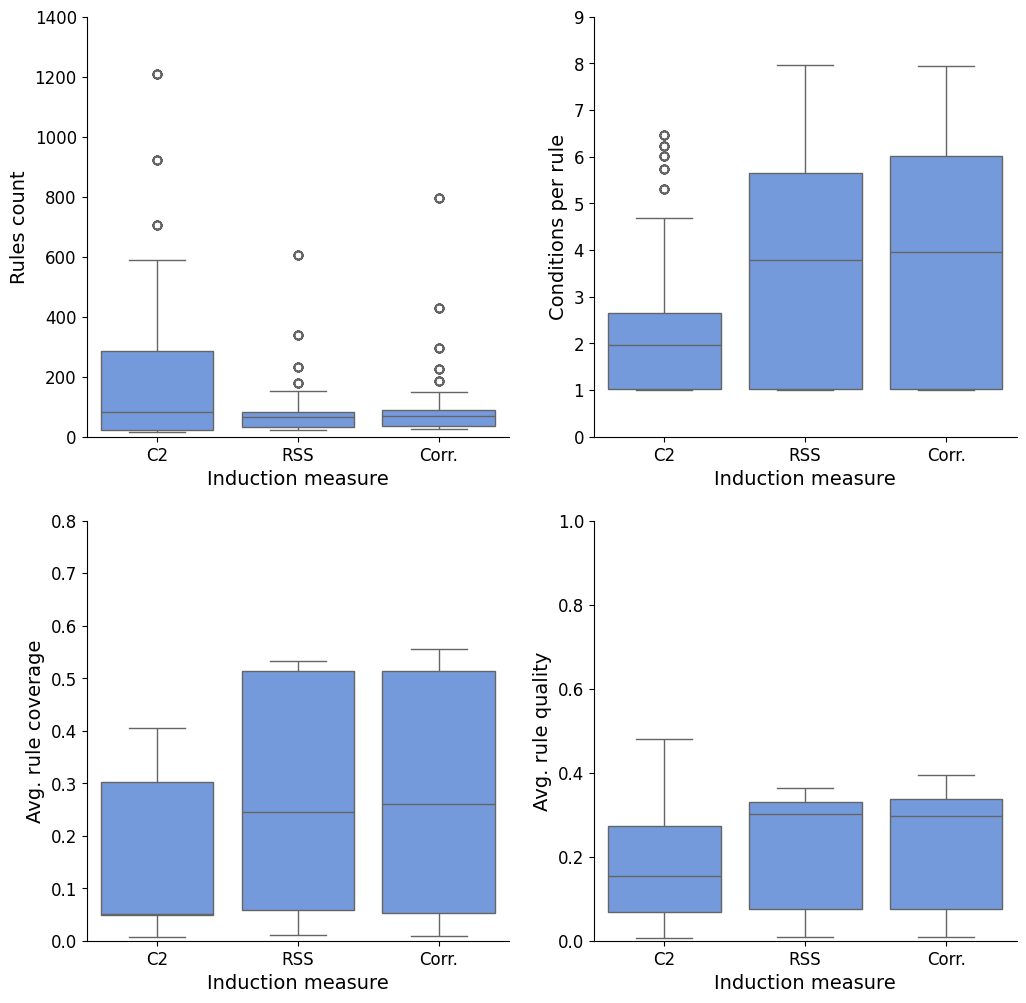

In [10]:
fontsize=14
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# induction_measureand rule count
b = sns.boxplot(data=hyperopts_result_df, x='param_induction_measure', y='mean_rules_count', 
                color='cornflowerblue', ax=axs[0][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,1400))

plt.draw()
b.set_xlabel('Induction measure',fontsize=fontsize)
b.set_ylabel('Rules count',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# induction_measureand conditions_per rule
b = sns.boxplot(data=hyperopts_result_df, x='param_induction_measure', y='mean_conditions_per_rule', 
                color='cornflowerblue', ax=axs[0][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,9))

plt.draw()
b.set_ylabel('Conditions per rule',fontsize=fontsize)
b.set_xlabel('Induction measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# induction_measure and avg_rule_coverage
b = sns.boxplot(data=hyperopts_result_df, x='param_induction_measure', y='mean_avg_rule_coverage', 
                color='cornflowerblue', ax=axs[1][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,0.8))

plt.draw()
b.set_ylabel('Avg. rule coverage',fontsize=fontsize)
b.set_xlabel('Induction measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# induction_measure and avg_rule_quality
b = sns.boxplot(data=hyperopts_result_df, x='param_induction_measure', y='mean_avg_rule_quality', 
                color='cornflowerblue', ax=axs[1][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,1))

plt.draw()
b.set_ylabel('Avg. rule quality',fontsize=fontsize)
b.set_xlabel('Induction measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)


/tmp/ipykernel_41539/1184844180.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/1184844180.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/1184844180.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/1184844180.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/1184844180.py:43: UserWarning

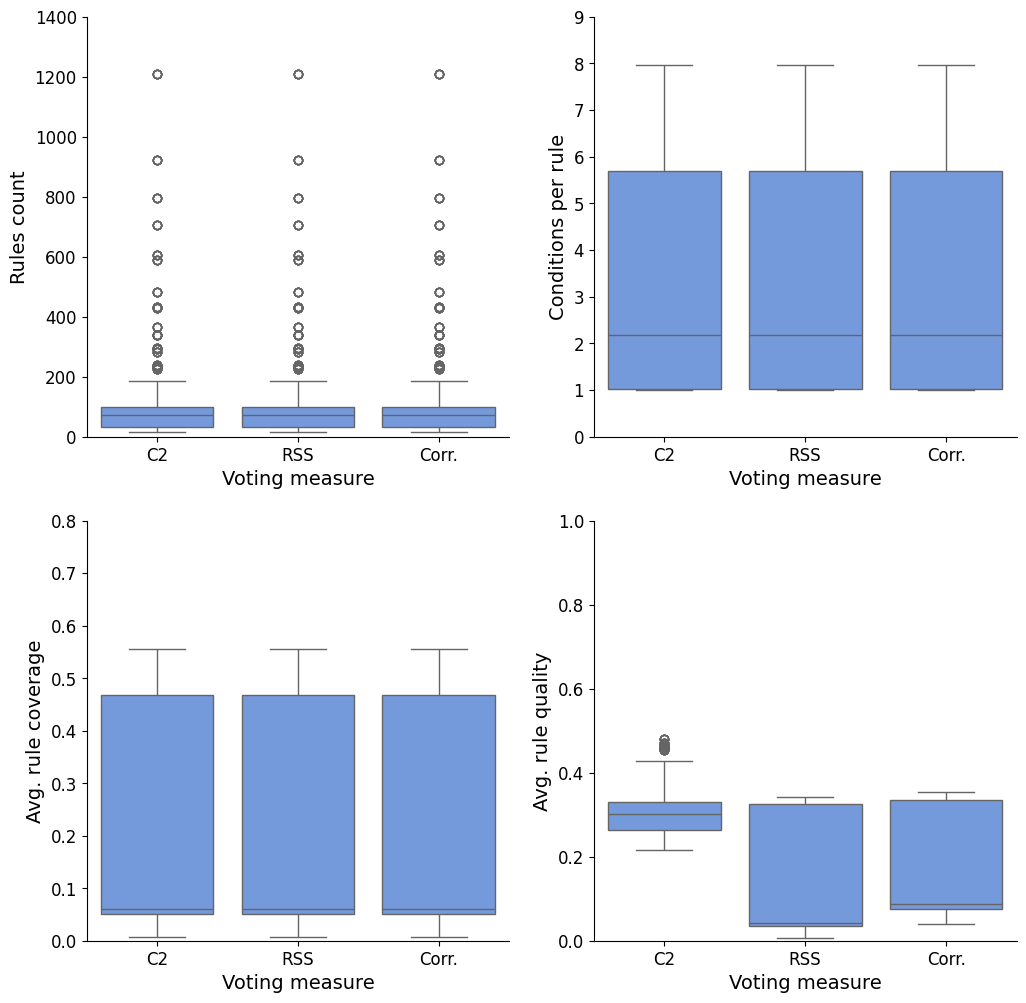

In [11]:
fontsize=14
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# voting_measureand rule count
b = sns.boxplot(data=hyperopts_result_df, x='param_voting_measure', y='mean_rules_count', 
                color='cornflowerblue', ax=axs[0][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,1400))

plt.draw()
b.set_xlabel('Voting measure',fontsize=fontsize)
b.set_ylabel('Rules count',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# voting_measureand conditions_per rule
b = sns.boxplot(data=hyperopts_result_df, x='param_voting_measure', y='mean_conditions_per_rule', 
                color='cornflowerblue', ax=axs[0][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,9))

plt.draw()
b.set_ylabel('Conditions per rule',fontsize=fontsize)
b.set_xlabel('Voting measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# voting_measure and avg_rule_coverage
b = sns.boxplot(data=hyperopts_result_df, x='param_voting_measure', y='mean_avg_rule_coverage', 
                color='cornflowerblue', ax=axs[1][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,0.8))

plt.draw()
b.set_ylabel('Avg. rule coverage',fontsize=fontsize)
b.set_xlabel('Voting measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# voting_measure and avg_rule_quality
b = sns.boxplot(data=hyperopts_result_df, x='param_voting_measure', y='mean_avg_rule_quality', 
                color='cornflowerblue', ax=axs[1][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,1))

plt.draw()
b.set_ylabel('Avg. rule quality',fontsize=fontsize)
b.set_xlabel('Voting measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

/tmp/ipykernel_41539/4067041670.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/4067041670.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/4067041670.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/4067041670.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/4067041670.py:43: UserWarning

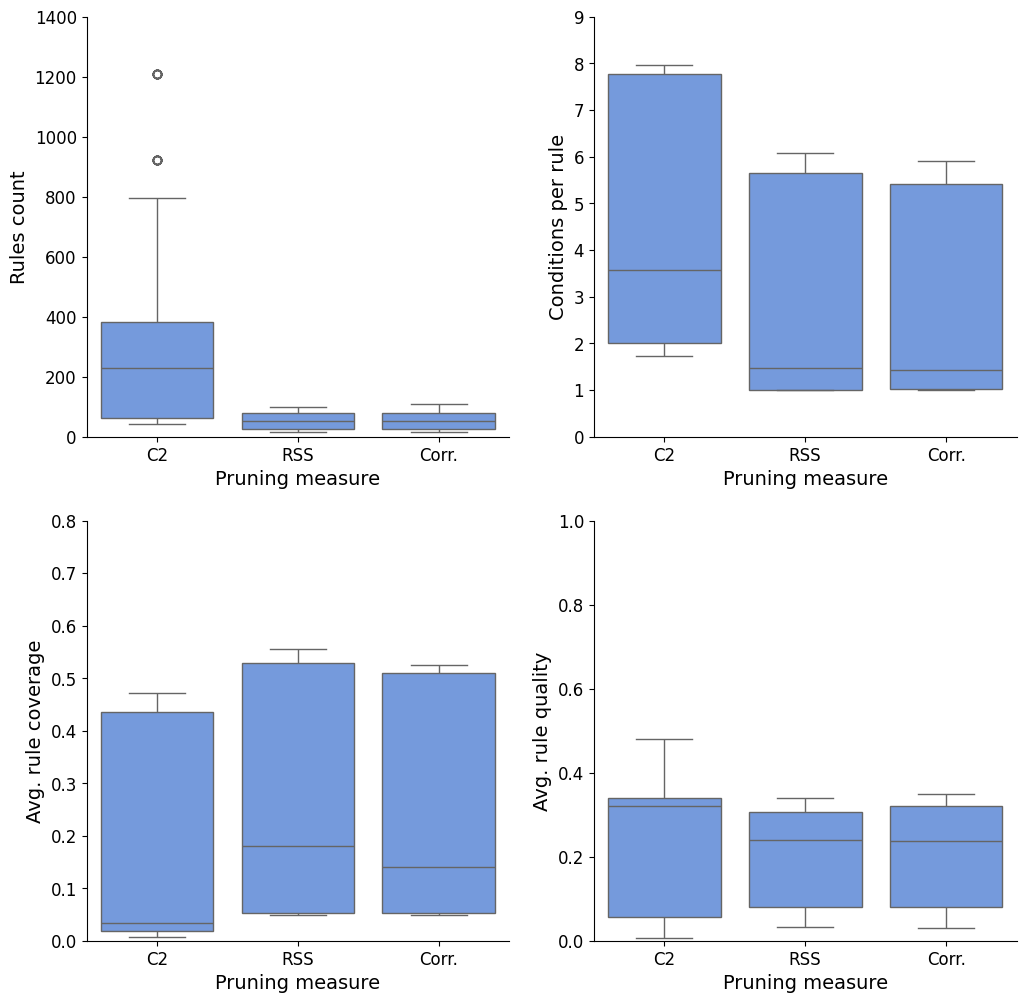

In [12]:
fontsize=14
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# pruning_measureand rule count
b = sns.boxplot(data=hyperopts_result_df, x='param_pruning_measure', y='mean_rules_count', 
                color='cornflowerblue', ax=axs[0][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,1400))

plt.draw()
b.set_xlabel('Pruning measure',fontsize=fontsize)
b.set_ylabel('Rules count',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# pruning_measureand conditions_per rule
b = sns.boxplot(data=hyperopts_result_df, x='param_pruning_measure', y='mean_conditions_per_rule', 
                color='cornflowerblue', ax=axs[0][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,9))

plt.draw()
b.set_ylabel('Conditions per rule',fontsize=fontsize)
b.set_xlabel('Pruning measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# pruning_measureand and avg_rule_coverage
b = sns.boxplot(data=hyperopts_result_df, x='param_pruning_measure', y='mean_avg_rule_coverage', 
                color='cornflowerblue', ax=axs[1][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,0.8))

plt.draw()
b.set_ylabel('Avg. rule coverage',fontsize=fontsize)
b.set_xlabel('Pruning measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# pruning_measureand and avg_rule_quality
b = sns.boxplot(data=hyperopts_result_df, x='param_pruning_measure', y='mean_avg_rule_quality', 
                color='cornflowerblue', ax=axs[1][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,1))

plt.draw()
b.set_ylabel('Avg. rule quality',fontsize=fontsize)
b.set_xlabel('Pruning measure',fontsize=fontsize)
b.set_xticklabels(['C2','RSS','Corr.'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

/tmp/ipykernel_41539/1609284893.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/1609284893.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/1609284893.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/1609284893.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/1609284893.py:43: UserWarning: 

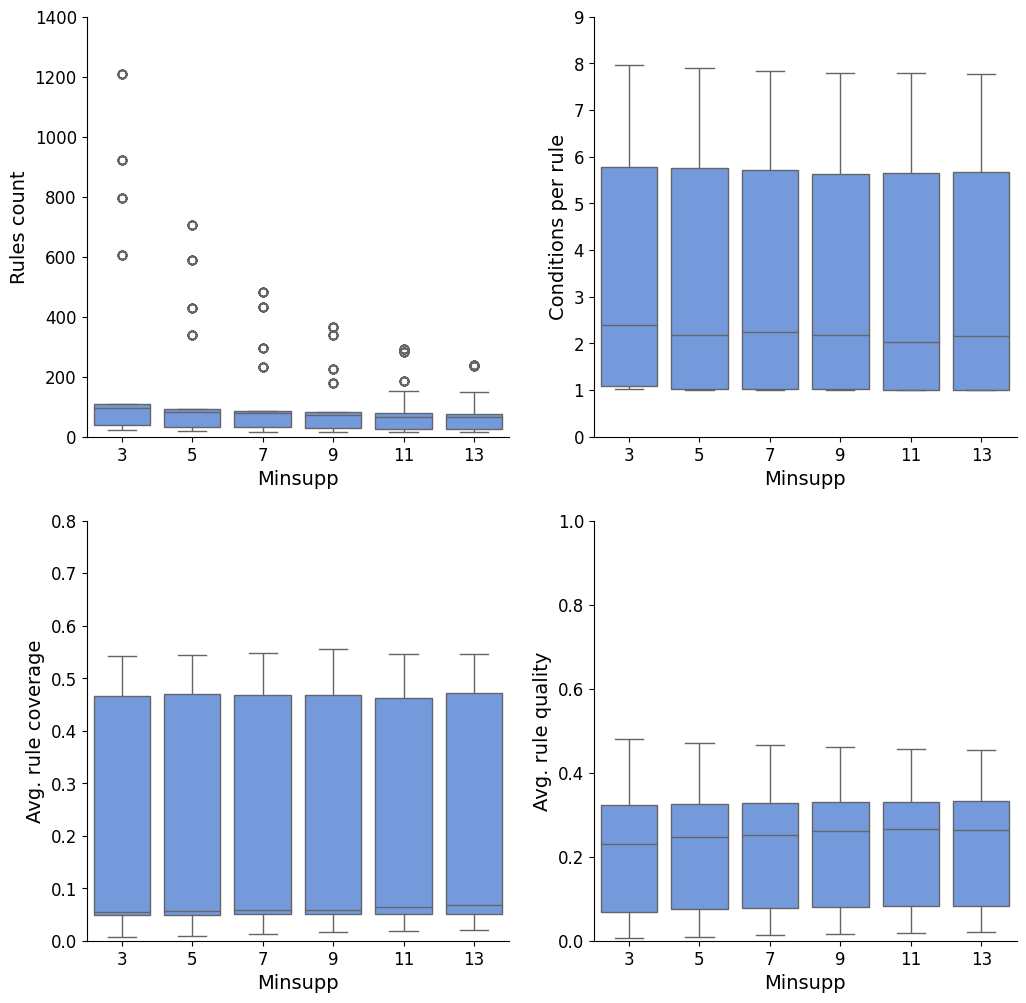

In [13]:
fontsize=14
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# minsupp_new and rule count
b = sns.boxplot(data=hyperopts_result_df, x='param_minsupp_new', y='mean_rules_count', 
                color='cornflowerblue', ax=axs[0][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,1400))

plt.draw()
b.set_xlabel('Minsupp',fontsize=fontsize)
b.set_ylabel('Rules count',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# minsupp_new conditions_per rule
b = sns.boxplot(data=hyperopts_result_df, x='param_minsupp_new', y='mean_conditions_per_rule', 
                color='cornflowerblue', ax=axs[0][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,9))

plt.draw()
b.set_ylabel('Conditions per rule',fontsize=fontsize)
b.set_xlabel('Minsupp',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# minsupp_new and avg_rule_coverage
b = sns.boxplot(data=hyperopts_result_df, x='param_minsupp_new', y='mean_avg_rule_coverage', 
                color='cornflowerblue', ax=axs[1][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,0.8))

plt.draw()
b.set_ylabel('Avg. rule coverage',fontsize=fontsize)
b.set_xlabel('Minsupp',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# minsupp_new and avg_rule_quality
b = sns.boxplot(data=hyperopts_result_df, x='param_minsupp_new', y='mean_avg_rule_quality', 
                color='cornflowerblue', ax=axs[1][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,1))

plt.draw()
b.set_ylabel('Avg. rule quality',fontsize=fontsize)
b.set_xlabel('Minsupp',fontsize=fontsize)
b.set_xticklabels(b.get_xticklabels(), fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)


/tmp/ipykernel_41539/891083265.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['False','True'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/891083265.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/891083265.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['False','True'], fontsize=fontsize-2, rotation=0)
/tmp/ipykernel_41539/891083265.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)
/tmp/ipykernel_41539/891083265.py:43: UserWarning: set_ticklab

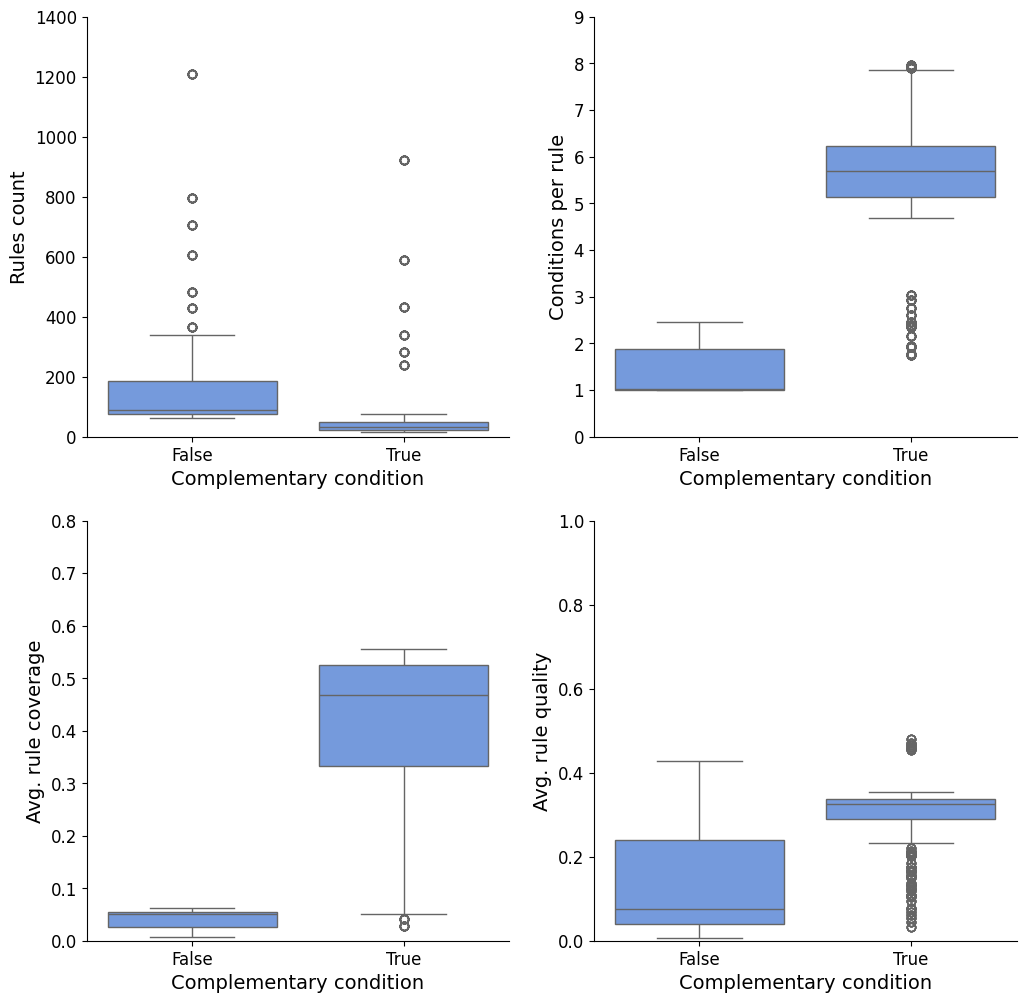

In [14]:
fontsize=14
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# complementary_condition and rule count
b = sns.boxplot(data=hyperopts_result_df, x='param_complementary_condition', y='mean_rules_count', 
                color='cornflowerblue', ax=axs[0][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,1400))

plt.draw()
b.set_xlabel('Complementary condition',fontsize=fontsize)
b.set_ylabel('Rules count',fontsize=fontsize)
b.set_xticklabels(['False','True'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# complementary_condition conditions_per rule
b = sns.boxplot(data=hyperopts_result_df, x='param_complementary_condition', y='mean_conditions_per_rule', 
                color='cornflowerblue', ax=axs[0][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,9))

plt.draw()
b.set_ylabel('Conditions per rule',fontsize=fontsize)
b.set_xlabel('Complementary condition',fontsize=fontsize)
b.set_xticklabels(['False','True'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# complementary_condition and avg_rule_coverage
b = sns.boxplot(data=hyperopts_result_df, x='param_complementary_condition', y='mean_avg_rule_coverage', 
                color='cornflowerblue', ax=axs[1][0])

sns.despine(top=True, right=True)

b.set(ylim=(0,0.8))

plt.draw()
b.set_ylabel('Avg. rule coverage',fontsize=fontsize)
b.set_xlabel('Complementary condition',fontsize=fontsize)
b.set_xticklabels(['False','True'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)

# complementary_condition and avg_rule_quality
b = sns.boxplot(data=hyperopts_result_df, x='param_complementary_condition', y='mean_avg_rule_quality', 
                color='cornflowerblue', ax=axs[1][1])

sns.despine(top=True, right=True)

b.set(ylim=(0,1))

plt.draw()
b.set_ylabel('Avg. rule quality',fontsize=fontsize)
b.set_xlabel('Complementary condition',fontsize=fontsize)
b.set_xticklabels(['False','True'], fontsize=fontsize-2, rotation=0)
_ = b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-2)